#One fruit fresh or rotten classification


##Installing dependencies

In [ ]:
import tensorflow as tf
print(tf.__version__)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from google.colab.patches import cv2_imshow as show

2.15.0


In [ ]:
from keras import Model, models, layers, metrics
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical

In [ ]:
from sklearn.utils import shuffle
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DissertationCNNModel/Data')

In [ ]:
print(os.listdir())

['test', 'train', 'model.png', '.ipynb_checkpoints', 'output.png']


In [ ]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/train'
TEST_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/test'

In [ ]:
os.listdir(TRAIN_DATA_DIR)

['rottenapples', 'freshapples', 'freshoranges', 'rottenoranges']

In [ ]:
CATEGORIES = ["freshapples", "rottenapples"]

FIND A FUCNTION TO SPLIT THE CATGORIES FOR SCALIBILITY

In [ ]:
CATEGORIES = os.listdir(TRAIN_DATA_DIR)
len(CATEGORIES)

4

In [ ]:
class_names = ['Fresh', 'Rotten']

##Using cv2 to read image of fresh apple & rotten apple

In [ ]:
fresh_apple_img = cv2.imread(os.path.join('train', 'freshapples', 'Screen Shot 2018-06-08 at 4.59.36 PM.png'))

In [ ]:
fresh_apple_img.shape

(476, 458, 3)

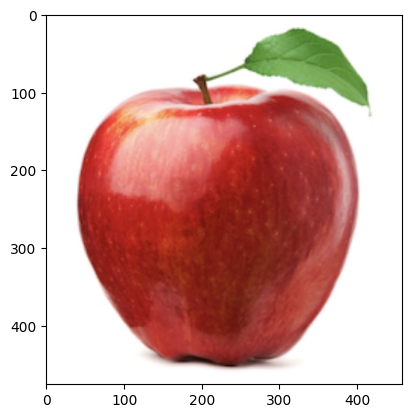

In [ ]:
plt.imshow(fresh_apple_img[:,:,::-1])
plt.show()

In [ ]:
rotten_apple_img = cv2.imread(os.path.join('train', 'rottenapples', 'Screen Shot 2018-06-07 at 2.15.20 PM.png'))

In [ ]:
rotten_apple_img.shape

(396, 368, 3)

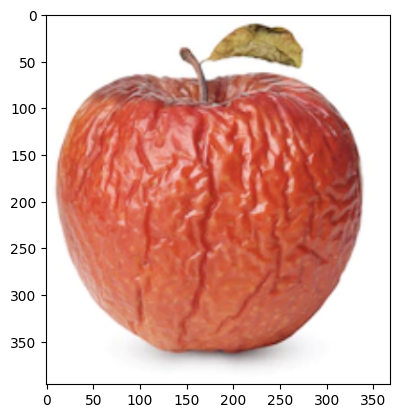

In [ ]:
plt.imshow(rotten_apple_img[:,:,::-1])
plt.show()

##Loading the images

In [ ]:
IMG_SIZE = 450

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TRAIN_DATA_DIR, category)  # path to training data, fresh and rotten apples
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])
      counter+=1
      if(counter == 500): break

create_training_data()

In [ ]:
x_train = []
y_train = []

In [ ]:
for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape
x_train = x_train / 255.0 #Normalisation


In [ ]:
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state = 0)


##A Simple CNN Architecture

In [ ]:
simple_cnn_model = Sequential()

simple_cnn_model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
simple_cnn_model.add(Activation("relu"))
simple_cnn_model.add(MaxPool2D(pool_size=(2,2)))

simple_cnn_model.add(Conv2D(64, (3,3)))
simple_cnn_model.add(Activation("relu"))
simple_cnn_model.add(MaxPool2D(pool_size=(2,2)))

simple_cnn_model.add(Flatten())

simple_cnn_model.add(Dense(64))
simple_cnn_model.add(Activation("relu"))

simple_cnn_model.add(Dense(1))
simple_cnn_model.add(Activation("sigmoid"))

In [ ]:
simple_cnn_model.compile(
  optimizer='adam',
  loss= 'binary_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
trained_model = simple_cnn_model.fit(x_train_shuffled, y_train_shuffled, batch_size = 16, epochs = 8, validation_split = 0.05 ) # batch_size = 32, epochs = 10, validation_split = 0.2, validation_data = (x_test, y_test)

Epoch 1/8
119/119 [==============================] - 25s 152ms/step - loss: -16849510.0000 - accuracy: 0.2458 - val_loss: -72403448.0000 - val_accuracy: 0.3500
Epoch 2/8
119/119 [==============================] - 14s 121ms/step - loss: -968045184.0000 - accuracy: 0.2447 - val_loss: -1940079616.0000 - val_accuracy: 0.3500
Epoch 3/8
119/119 [==============================] - 14s 122ms/step - loss: -8358028800.0000 - accuracy: 0.2447 - val_loss: -11735319552.0000 - val_accuracy: 0.3500
Epoch 4/8
119/119 [==============================] - 15s 122ms/step - loss: -34870816768.0000 - accuracy: 0.2447 - val_loss: -40440709120.0000 - val_accuracy: 0.3500
Epoch 5/8
119/119 [==============================] - 15s 124ms/step - loss: -98491760640.0000 - accuracy: 0.2447 - val_loss: -101980569600.0000 - val_accuracy: 0.3500
Epoch 6/8
119/119 [==============================] - 15s 124ms/step - loss: -224016515072.0000 - accuracy: 0.2447 - val_loss: -218252279808.0000 - val_accuracy: 0.3500
Epoch 7/8
1

In [ ]:
simple_cnn_model.summary()

#VGG16 model

In [ ]:
VGG16_model = Sequential()

VGG16_model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:], padding="same", activation="relu"))
VGG16_model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2, 2)))

VGG16_model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2, 2)))

VGG16_model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2, 2)))

VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2, 2)))

VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2, 2)))

VGG16_model.add(Flatten())
VGG16_model.add(Dense(4096, activation="relu"))
VGG16_model.add(Dense(4096, activation="relu"))
VGG16_model.add(Dense(1))
VGG16_model.add(Activation ('sigmoid'))

In [ ]:
VGG16_model.compile(
  optimizer='adam',
  loss= 'binary_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
trained_model = VGG16_model.fit(x_train_shuffled, y_train_shuffled, batch_size = 16, epochs = 8, validation_split = 0.1 ) # batch_size = 32, epochs = 10, validation_split = 0.2, validation_data = (x_test, y_test)

##ResNet Model

In [ ]:
ResNet_model = Sequential()

ResNet_model.add(Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape = x_train.shape[1:]))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))
ResNet_model.add(MaxPool2D((3, 3), strides=(2, 2), padding='same'))


ResNet_model.add(Conv2D(64, (3, 3), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))
ResNet_model.add(Conv2D(64, (3, 3), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))


ResNet_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))
ResNet_model.add(Conv2D(128, (3, 3), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))


ResNet_model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))
ResNet_model.add(Conv2D(256, (3, 3), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))


ResNet_model.add(Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))
ResNet_model.add(Conv2D(512, (3, 3), padding='same'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Activation('relu'))

ResNet_model.add(Flatten())

# Fully Connected Layer
ResNet_model.add(Dense(1))
ResNet_model.add(Activation('sigmoid'))

In [ ]:
ResNet_model.compile(
  optimizer='adam',
  loss= 'binary_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
trained_model = ResNet_model.fit(x_train_shuffled, y_train_shuffled, batch_size = 16, epochs = 8, validation_split = 0.1 ) # batch_size = 32, epochs = 10, validation_split = 0.2, validation_data = (x_test, y_test)

Epoch 1/8
57/57 [==============================] - 13s 151ms/step - loss: 1.4310 - accuracy: 0.7900 - val_loss: 5.2438 - val_accuracy: 0.4800
Epoch 2/8
57/57 [==============================] - 8s 135ms/step - loss: 0.7423 - accuracy: 0.8711 - val_loss: 63.9598 - val_accuracy: 0.4800
Epoch 3/8
57/57 [==============================] - 8s 136ms/step - loss: 0.7177 - accuracy: 0.8844 - val_loss: 3.8158 - val_accuracy: 0.7800
Epoch 4/8
57/57 [==============================] - 8s 137ms/step - loss: 0.4762 - accuracy: 0.9022 - val_loss: 19.6238 - val_accuracy: 0.5500
Epoch 5/8
57/57 [==============================] - 8s 138ms/step - loss: 0.3174 - accuracy: 0.9256 - val_loss: 1.1709 - val_accuracy: 0.7900
Epoch 6/8
57/57 [==============================] - 8s 139ms/step - loss: 0.2041 - accuracy: 0.9389 - val_loss: 0.2015 - val_accuracy: 0.9400
Epoch 7/8
57/57 [==============================] - 8s 138ms/step - loss: 0.2729 - accuracy: 0.9267 - val_loss: 0.1605 - val_accuracy: 0.9100
Epoch 8/8


In [ ]:
ResNet_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 448, 448, 64)      1792      
                                                                 
 activation_5 (Activation)   (None, 448, 448, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 224, 224, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 activation_6 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                 

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
import visualkeras

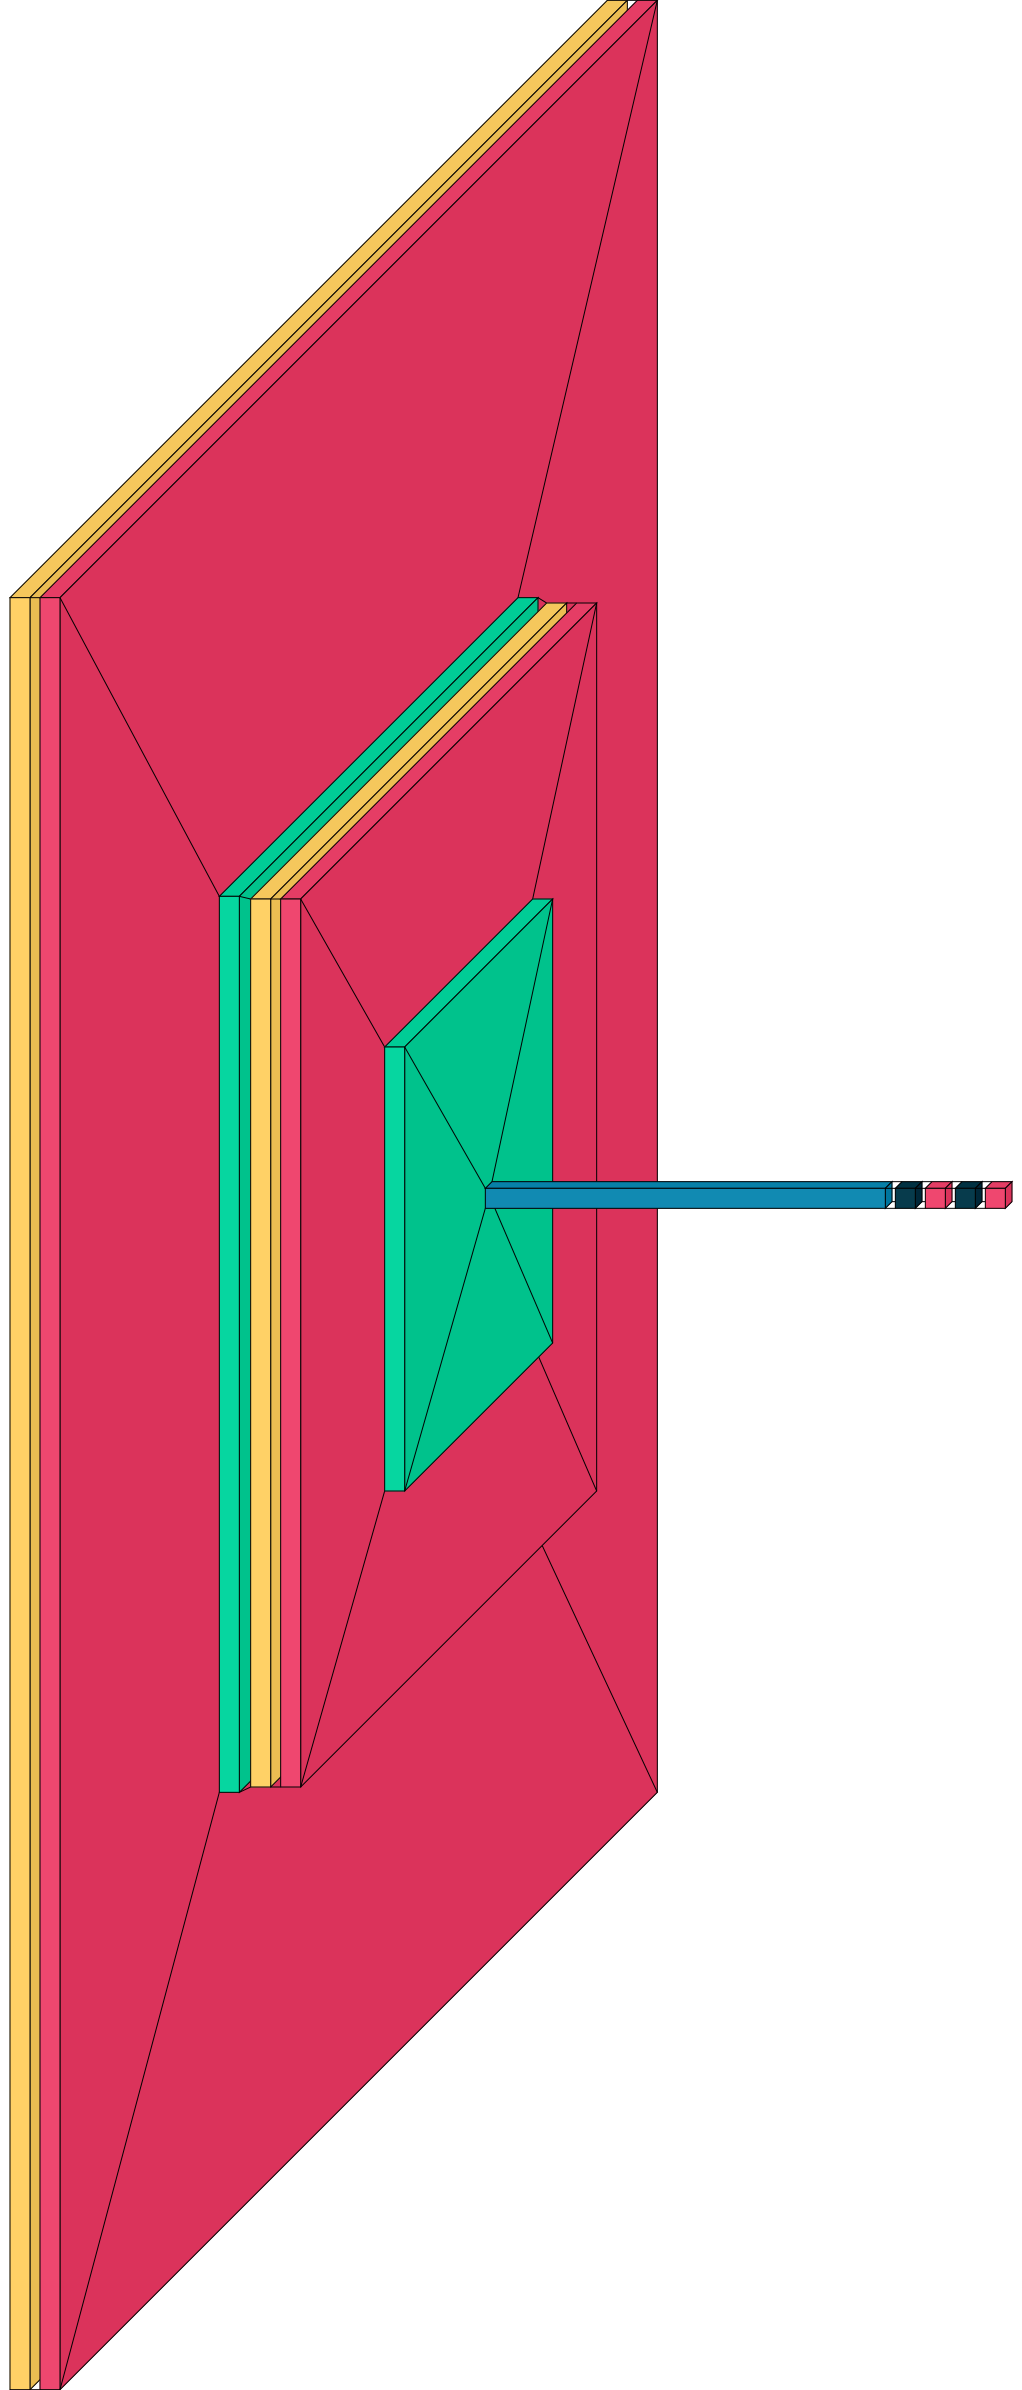

In [ ]:
model = simple_cnn_model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

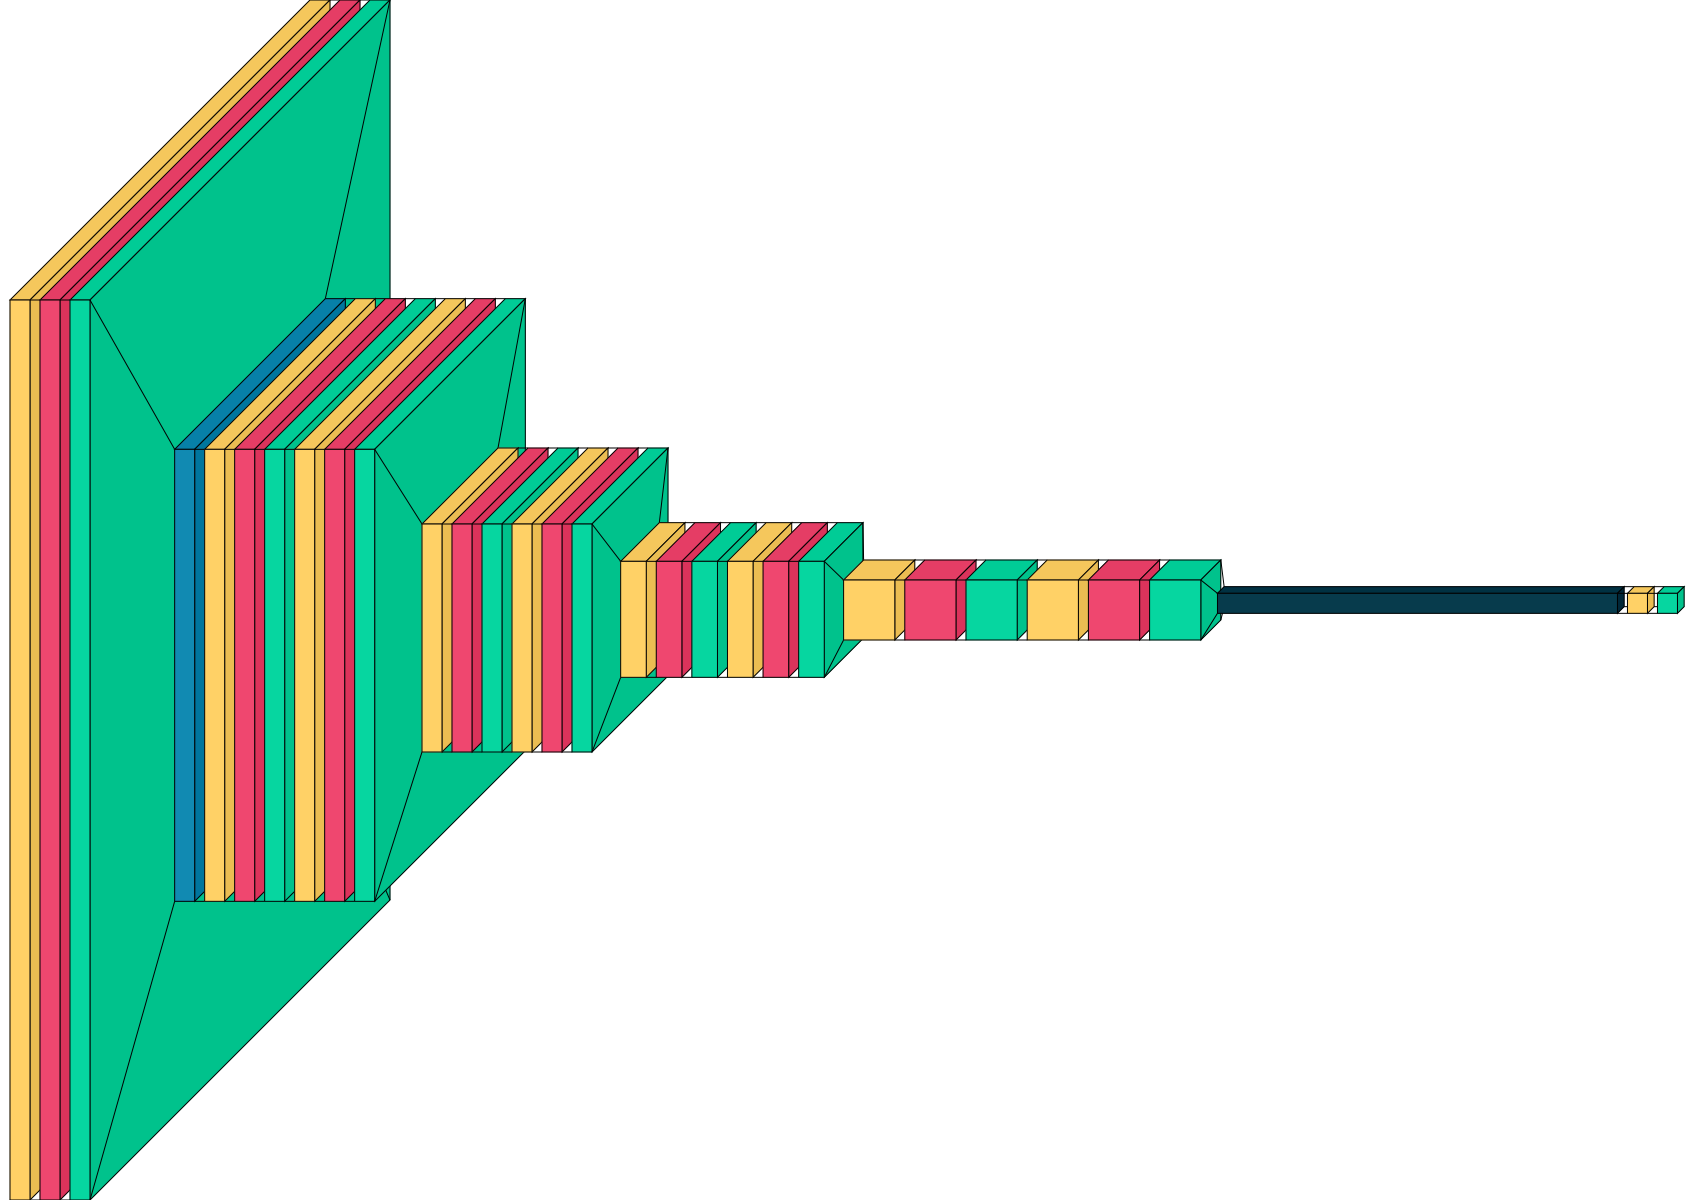

In [ ]:
model = ResNet_model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

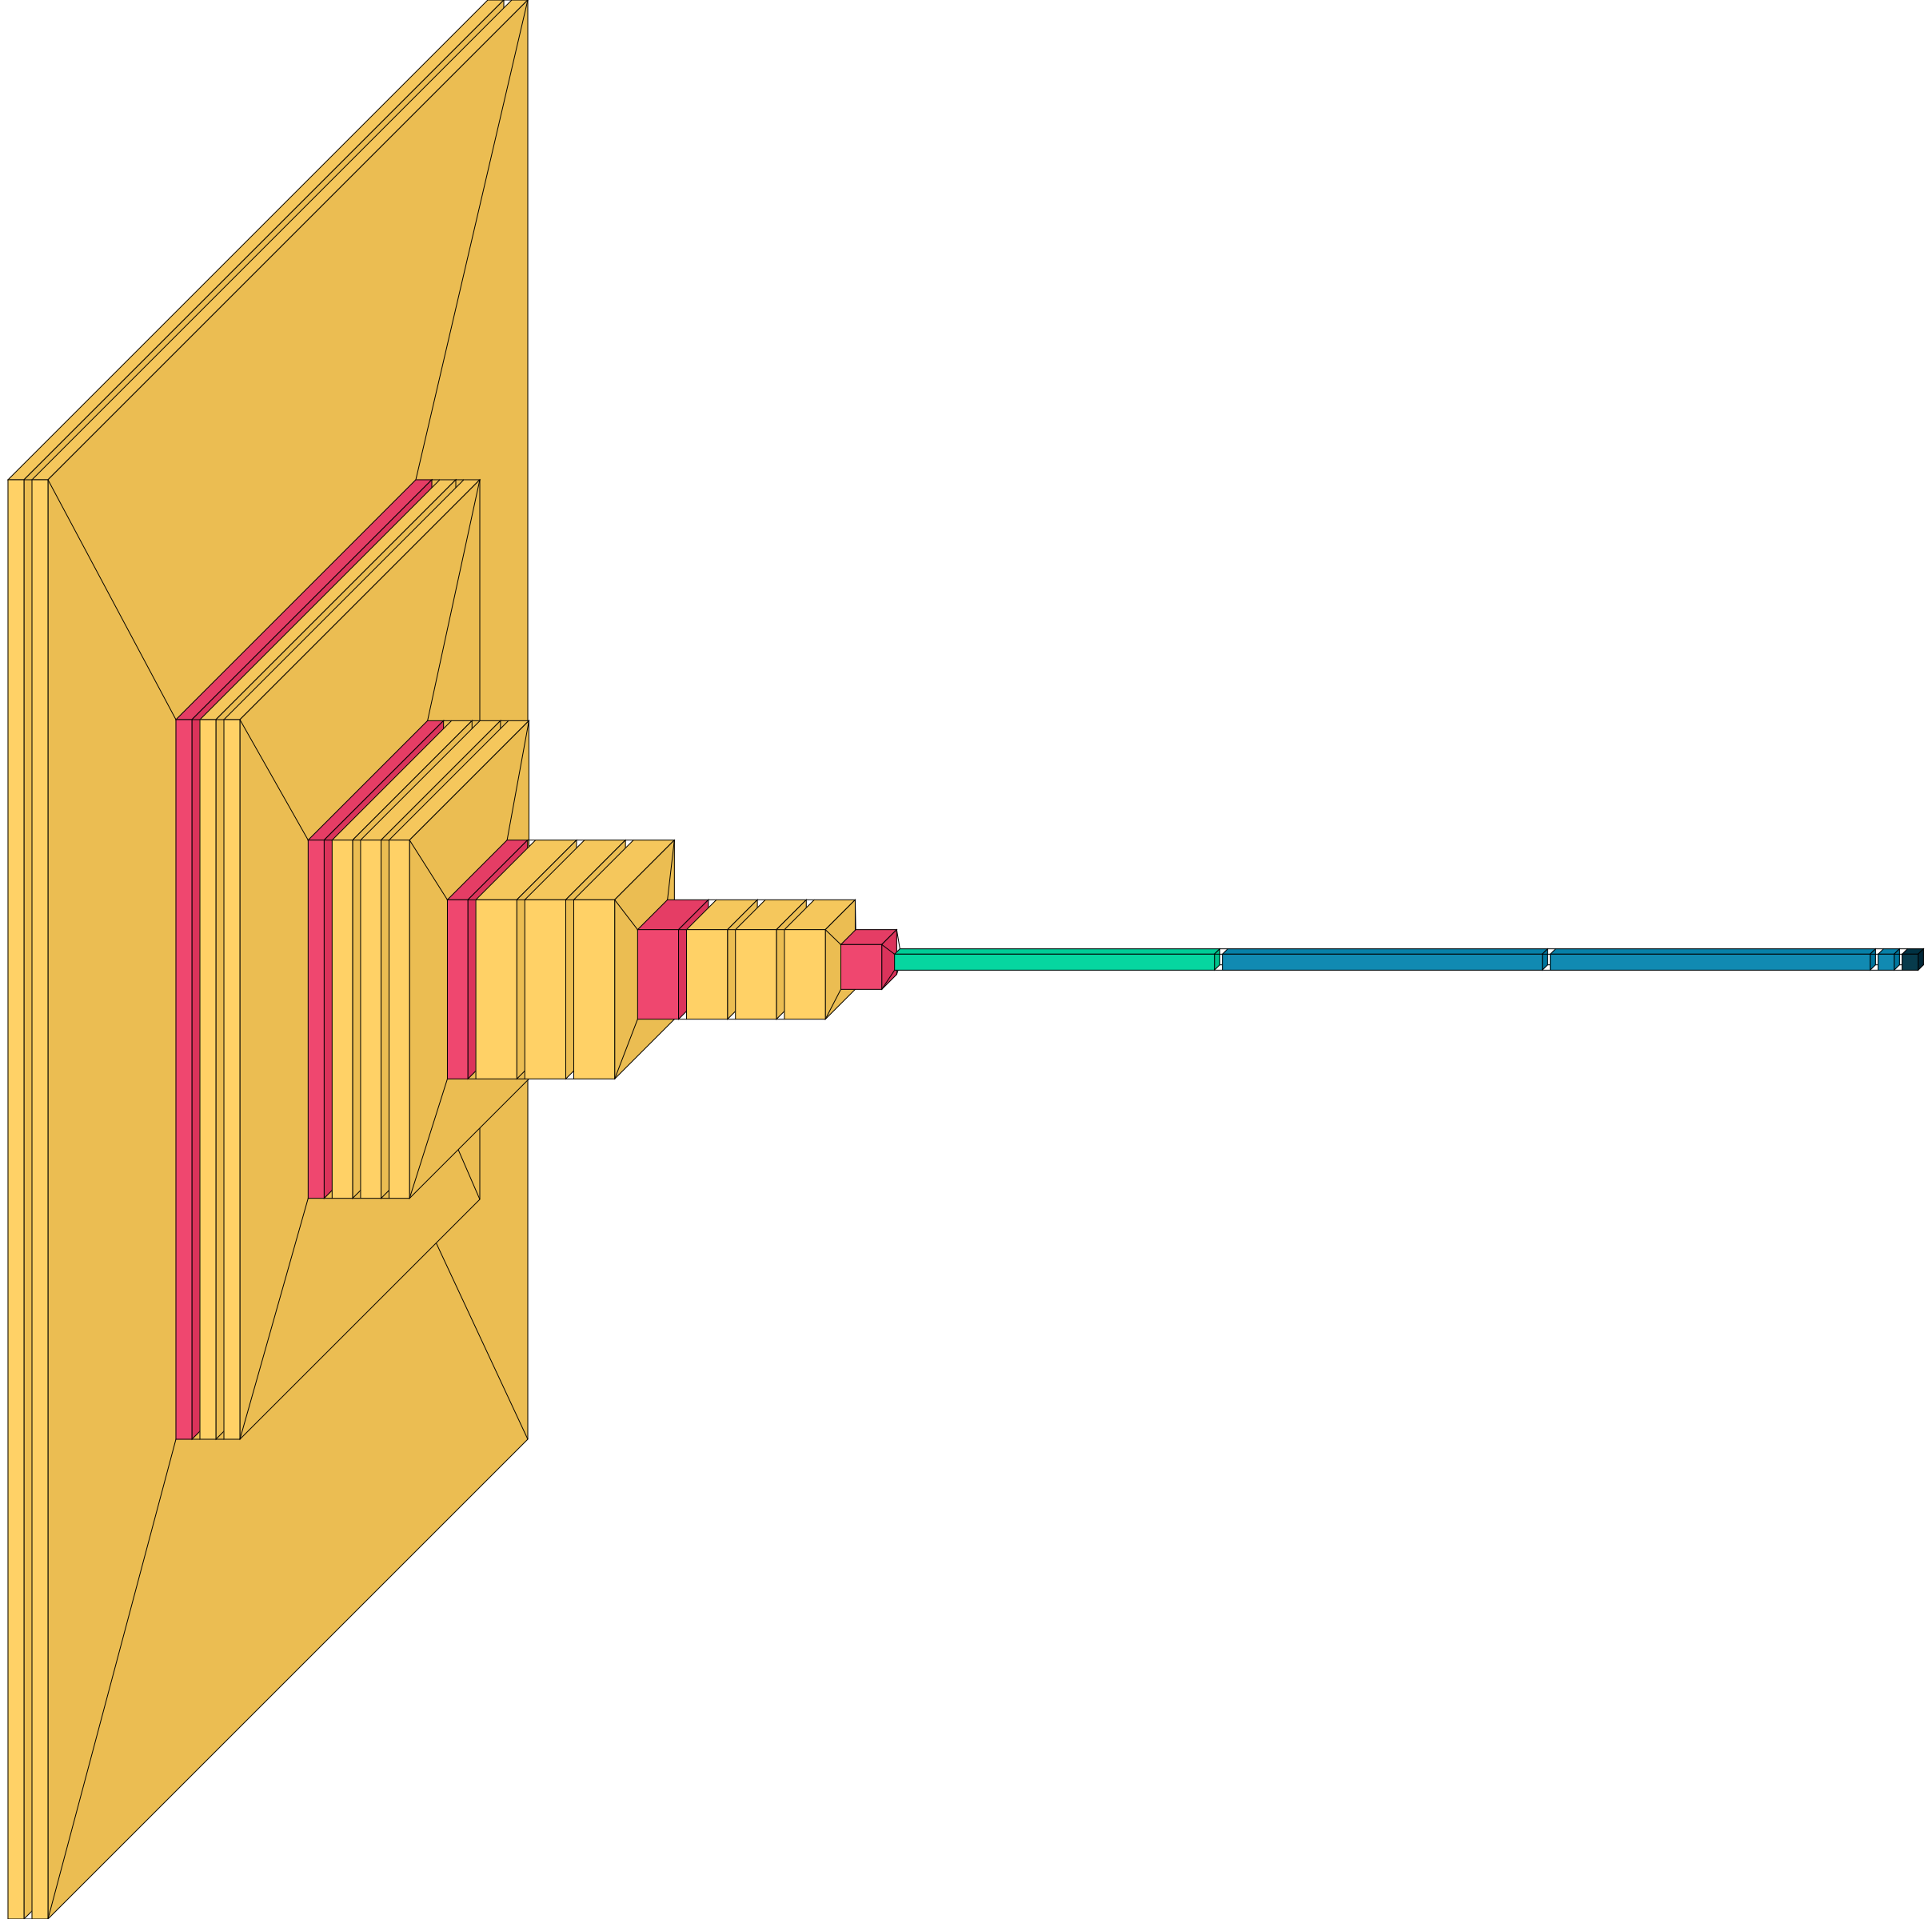

In [ ]:
model = VGG16_model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

##saving the model

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json = simple_cnn_model.to_json()

In [ ]:
with open("simple_cnn_model.json", 'w') as json_file:
  json_file.write(model_json)

ResNet_model.save_weights("simple_cnn_model_weights.h5")
print("Model saved to the disk")

Model saved to the disk


In [ ]:

json_file = open("/content/drive/MyDrive/DissertationCNNModel/simple_cnn_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/DissertationCNNModel/simple_cnn_model_weights.h5")
print("Model loaded")

Model loaded


In [ ]:
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#samples of the data

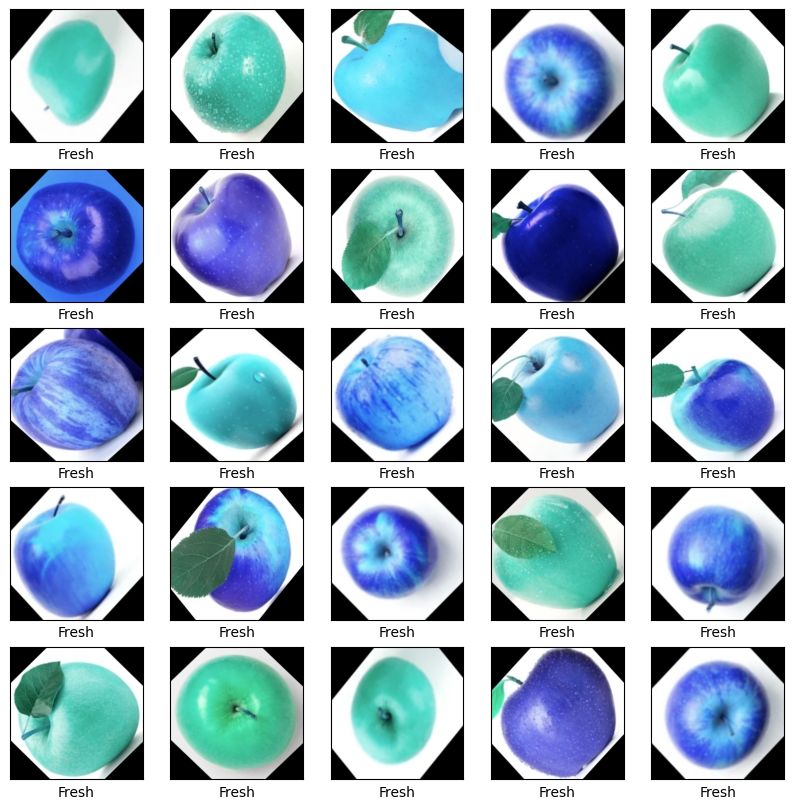

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

#loading the test data

In [ ]:
test_data = []

def create_test_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TEST_DATA_DIR, category)  # path to testing data, fresh and rotten apples
    print(path)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      test_data.append([new_array, class_num])
      counter+=1
      if(counter == 200): break

create_test_data()

/content/drive/MyDrive/DissertationCNNModel/Data/test/freshapples
/content/drive/MyDrive/DissertationCNNModel/Data/test/rottenapples


In [ ]:
x_test = []
y_test = []

In [ ]:
for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape


(400, 450, 450, 3)

In [ ]:
x_test_shuffled, y_test_shuffled = shuffle(x_test, y_test, random_state = 0)

#feeding the test data with the loaded model

In [ ]:
predictions = loaded_model.predict(x_test)

13/13 [==============================] - 3s 47ms/step


In [ ]:
final_predictions = []
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

In [ ]:
print(final_predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 

In [ ]:
print(y_test)